In [46]:
import numpy as np # 
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]
df1.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

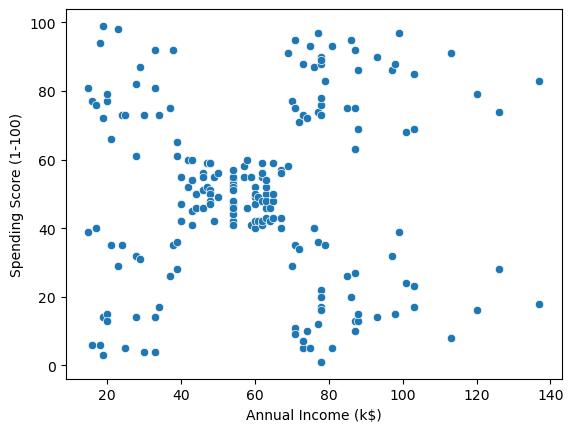

In [49]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)")

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_new=ss.fit_transform(df1)
x_new

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [51]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)
    

In [52]:
wcss

[400.0,
 273.66888662642015,
 157.70400815035947,
 123.43171680553705,
 65.57885579985047,
 55.11422576528423,
 47.70784156804295,
 44.71194842006207,
 38.064332773980965,
 33.74980691364644]

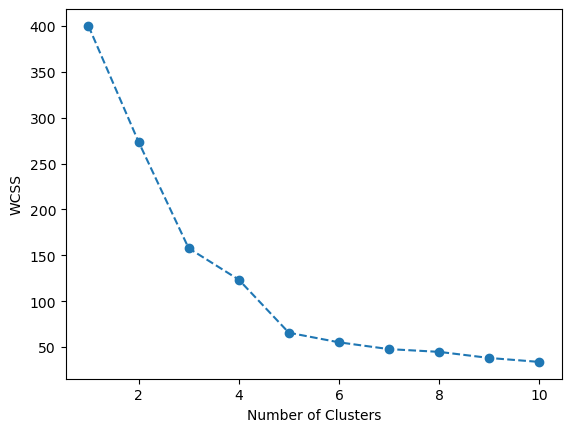

In [53]:
# Applying elbow method for optimal number of k
plt.plot(range(1,11),wcss,'o--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [82]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x_new)
ypredicted_classes=kmeans.predict(x_new)
ypredicted_classes

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [84]:
df["Target"]=ypredicted_classes
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [86]:
kmeans.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [88]:
kmeans.cluster_centers_[:,1]

array([-1.13696536, -0.02645617, -1.28443907,  1.13217788,  1.23950275])

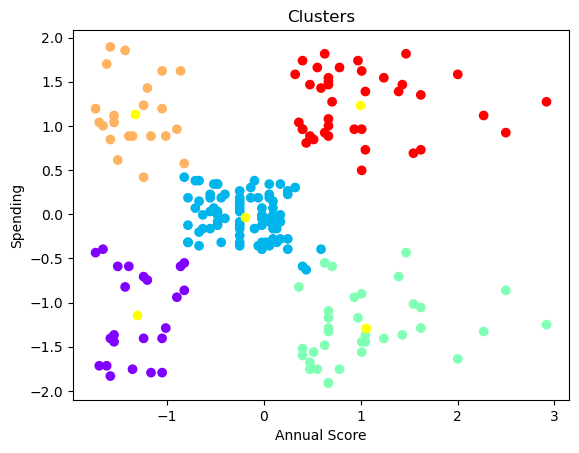

In [90]:
plt.scatter(x_new[:,0],x_new[:,1],c=df["Target"],cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow")
plt.xlabel("Annual Score")
plt.ylabel("Spending")
plt.title("Clusters")
plt.show()